# <center>Распознавание образов, описываемых бинарными признаками </center>

In [21]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import binom
plt.style.use(['seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['font.family'] = 'DejaVu Sans'

Зададим изображения букв в виде матриц 7x5 (как в matlab скрипте <a href ='https://www.mathworks.com/help/nnet/examples/character-recognition.html'>prprob</a>).

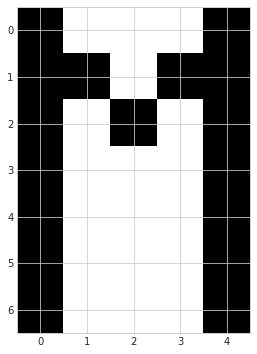

In [22]:
M = np.array([[1,0,0,0,1],
              [1,1,0,1,1],
              [1,0,1,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1]])
plt.imshow(1-M,cmap='gray');

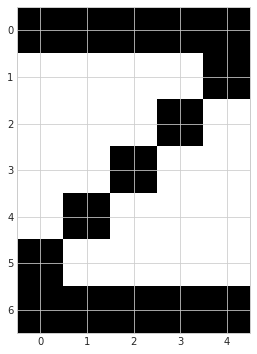

In [23]:
Z = np.array([[1,1,1,1,1],
               [0,0,0,0,1],
               [0,0,0,1,0],
               [0,0,1,0,0],
               [0,1,0,0,0],
               [1,0,0,0,0],
               [1,1,1,1,1]])
plt.imshow(1-Z,cmap='gray');

In [24]:
n = 35 #кол-во признаков
N = 2  #чиcло классов

s = np.zeros([n,2])#исходные изображения
s[:,0] = M.ravel()
s[:,1] = Z.ravel()

pw1 = 0.3
pw2 = 0.7
pw = [pw1,pw2] #априорные вероятности 

P = 20 #кол-во шагов изменения параметра pi
K = 1000 #кол-во испытаний

ns = sum(abs(s[:,0]-s[:,1])) #несовпадающие элементы
s_ = 1 - s 

pi,p12th,p21th,p12ex,p21ex = np.zeros(P),np.zeros(P),np.zeros(P),np.zeros(P),np.zeros(P)
#pi - вероятность искажения элемента
Pc_ = np.zeros([2,2,P])
plots = []

In [25]:
for i in range(P):
    pi[i] = (1/P)*i
    pI = pi[i]
    
    if pI == 0: 
        pI=0.0001
    if pI == 0.5: 
        pI=0.4999
        
    pI_ = 1-pI
    G1 = np.zeros(n)
    G2 = np.zeros(n) 
    
    for a in range(n):
        G1[a]=np.log((s[a,0]*pI_+s_[a,0]*pI)/(s[a,1]*pI_+s_[a,1]*pI))
        G2[a]=np.log((s[a,0]*pI+s_[a,0]*pI_)/(s[a,1]*pI+s_[a,1]*pI_))
    l0_ = np.log(pw[1]/pw[0])
    L0 = l0_/(2*np.log(pI_)-2*np.log(pI)) + ns/2
    L0r = np.floor(L0)
    if pI<0.5:
        p12th[i] = binom.cdf(L0r,ns,pI_)
        p21th[i] = 1-binom.cdf(L0r,ns,pI)
    else:
        p12th[i] = 1-binom.cdf(L0r,ns,pI_)
        p21th[i] = binom.cdf(L0r,ns,pI)
    
    for k in range(K):
        for j in range(N):
            x = s[:,j].copy()
            r = np.random.rand(n)
            ir = np.where(r<pI)[0]
            x[ir] = 1 - x[ir]
            x_ = 1 - x
            u = np.dot(G1,x) + np.dot(G2,x_) - l0_
            if u > 0:
                iai = 0
            else:
                iai = 1
                
            Pc_[iai,j,i] = Pc_[iai,j,i]+1
    
            if (k == 0) and (i == 1):
                IAx = np.reshape(x_,(7,5))
                plots.append(IAx)
    Pc_/= K 
    p12ex[i] = Pc_[1,0,i] 
    p21ex[i] = Pc_[0,1,i]

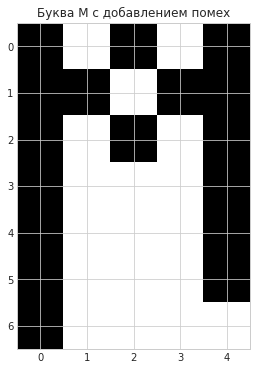

In [26]:
plt.imshow(plots[0],cmap='gray')
plt.title('Буква М с добавлением помех');

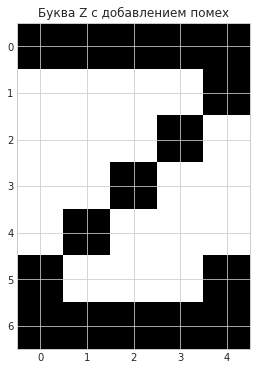

In [27]:
plt.imshow(plots[1],cmap='gray')
plt.title('Буква Z с добавлением помех');

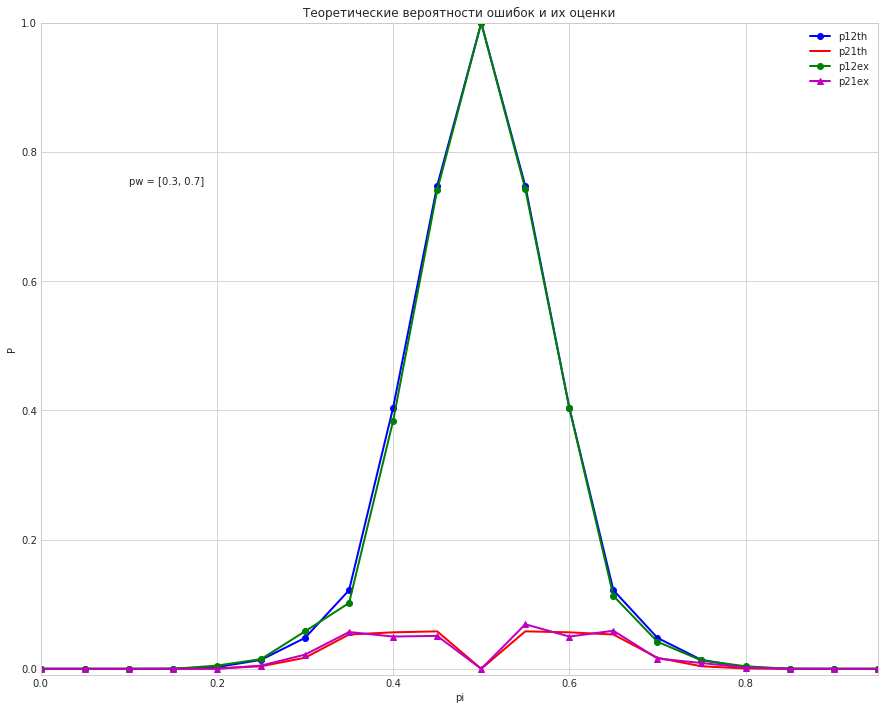

In [28]:
plt.rcParams['figure.figsize'] = (15, 12)
ms= 1
axes = plt.gca()
axes.set_xlim(min(pi), max(pi))
axes.set_ylim(-0.01, ms)
plt.plot(pi,p12th,'-ob',label = 'p12th',linewidth=2.0)
plt.plot(pi,p21th,'-r',label = 'p21th',linewidth=2.0)
plt.plot(pi,p12ex,'-og',label = 'p12ex',linewidth=2.0)
plt.plot(pi,p21ex,'-^m',label = 'p21ex',linewidth=2.0)
plt.title('Теоретические вероятности ошибок и их оценки')
plt.xlabel('pi')
plt.ylabel('P')
ann = 'pw = {}'.format(pw)
plt.annotate(ann,(0.1,0.75*ms)) 
plt.legend();